## Spectral Analysis Examples

In [128]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import random
import xrft

## --> Simple Example <-

This version produces 2 sin functions, combines them, then produces a spectral analysis curve.

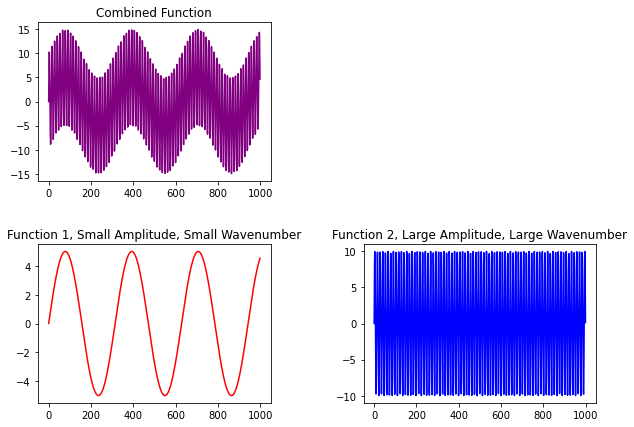

In [169]:
points = 1000
x = np.arange(points)
plt.figure(figsize=(10,7))

a1, k1 = (5,20)
a2, k2 = (10,500)

title1 = "Function 1"
title2 = "Function 2"
if a1>a2:
    title1+=", Large Amplitude"
    title2+=", Small Amplitude"
else:
    title1+=", Small Amplitude"
    title2+=", Large Amplitude"
if k1>k2:
    title1+=", Large Wavenumber"
    title2+=", Small Wavenumber"
else:
    title1+=", Small Wavenumber"
    title2+=", Large Wavenumber"


y1 = np.sin(k1*(x/points))*a1
y2 = np.sin(k2*(x/points))*a2
yt = y1+y2

plt.subplot(2,2,1)
plt.plot(x, yt, color='purple')
plt.title("Combined Function")

plt.subplot(2,2,3)
plt.plot(x,y1, color='r')
plt.title(title1)

plt.subplot(2,2,4)
plt.plot(x,y2, color='blue')
plt.title(title2)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Text(0, 0.5, 'Amplitude')

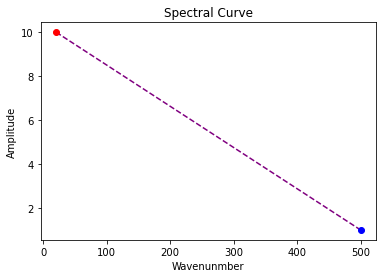

In [167]:
x = [k1,k2]
y = [a1,a2]

plt.plot(x,y, linestyle='dashed', color='purple')
plt.plot(k1,a1, marker='o', color='red')
plt.plot(k2,a2, marker='o', color='blue')
plt.title("Spectral Curve")
plt.xlabel("Wavenunmber")
plt.ylabel("Amplitude")

## --> Complex Example <--

This test produces 6 sin functions, combines them, plots k vs a for each, and plots a trendline.

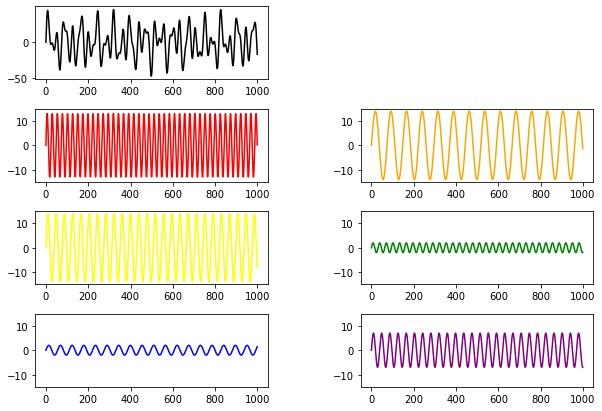

In [121]:
points = 1000
x = np.arange(points)
plt.figure(figsize=(10,7))

#define variables for plot color, amplitude and wavenumber
#define an empty list and function for y
color_li = ['red','orange','yellow','green','blue','purple']
a_li = np.random.randint(1,15,6)
k_li = np.random.randint(10,300,6)
y_li = []
y_funct = 0

#define np arrays for the trendline to work
k = np.array(k_li)
a = np.array(a_li)

#define each sin function, add it to the empty list, and plot it
for n in range(0,6):
    y = np.sin(k[n]*(x/points))*a[n]
    y_li.append(y)

    plt.subplot(4,2,n+3)
    plt.plot(x,y, color=color_li[n])
    plt.ylim(-15,15)

#define the sum of all equations
for y in y_li:
    y_funct =y_funct + y

#plot the sum of all equations
plt.subplot(4,2,1)
plt.plot(x,y_funct, color='black')
plt.subplots_adjust(wspace=0.4, hspace=0.4) 

(0.0, 15.0)

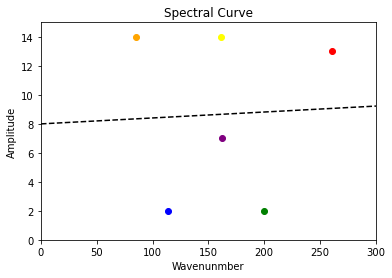

In [122]:
#for each sin function, plot wavenumber vs amplitude
for n in range(0,6):
    plt.scatter(k_li[n], a_li[n], marker='o', color=color_li[n])

#plot the trendline of all the functions
z=np.polyfit(k_li, a_li, 1)
p=np.poly1d(z)
plt.plot(x,p(x), color='black', linestyle='dashed')

plt.title("Spectral Curve")
plt.xlabel("Wavenunmber")
plt.ylabel("Amplitude")
plt.xlim(0,300)
plt.ylim(0,15)

## --> More Complex Example <--

Creates an xarray da that contains k, a, color and uses xrft to conduct the spectral analysis (haven't figured out xrft yet)

In [253]:
points = 1000
modes = 6
x = np.linspace(0,2*np.pi,num=points)

#define variables for plot color, amplitude and wavelength
#define an empty list and function for y
color_li = ['red','orange','yellow','green','blue','purple']
a_li = np.random.randint(1,15,modes)
k_li = np.random.randint(1,40,modes)
y_li = np.zeros((points,modes))
y_funct = np.zeros((points,1))

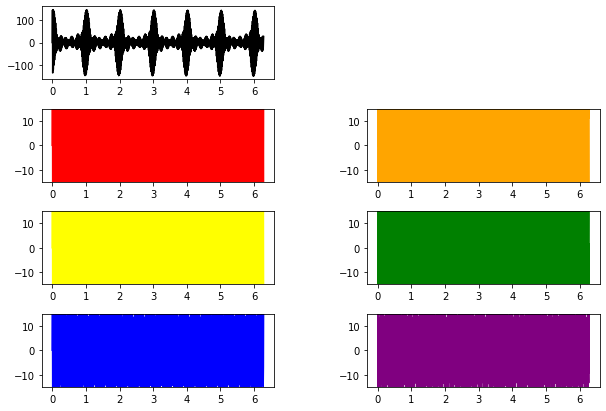

In [375]:
plt.figure(figsize=(10,7))

#define each sin function, add it to the empty list, and plot it
for n in range(0,6):
    y_li[:,n] = np.sin(int(k_li[n])*(x)*2*np.pi)*int(a_li[n])

    plt.subplot(4,2,n+3)
    plt.plot(x,y_li[:,n], color=color_li[n])
    plt.ylim(-15,15)

#define the sum of all equations
y_funct = y_li.sum(axis=1)

#plot the sum of all equations
plt.subplot(4,2,1)
plt.plot(x,y_funct, color='black')
plt.subplots_adjust(wspace=0.4, hspace=0.4)

array([18,  5, 12, 26, 38,  5])

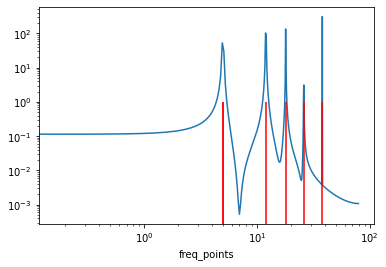

In [261]:
da_modes = xr.DataArray(y_li, dims=['points','modes'], coords={'points':x})
da_funct = xr.DataArray(y_funct, dims=['points'], coords={'points':x})
da_spec = xrft.power_spectrum(da_funct, dim='points')
da_spec.plot()
plt.xscale('log')
plt.yscale('log')
plt.vlines(k_li,0,1,color='r')
k_li

## --> Pre-determined Slope Example <--

In [515]:
points=1000
modes=10
slope=-3

a_start=35
k_start=50

a_li=np.zeros((modes,1))
k_li=np.zeros((modes,1))
y_li=np.zeros((points,modes))
y_funct=np.zeros((points,1))

a_li[0,0]=a_start
k_li[0,0]=k_start

for n in range(0,modes-1):
    this_a=a_li[n,0]
    next_a=int(this_a+slope)
    a_li[n+1,0]=next_a
    
    this_k=k_li[n,0]
    next_k=int(this_k+1)
    k_li[n+1,0]=next_k
    
    real_slope=(this_a-next_a)/(this_k-next_k)
    #print(real_slope)

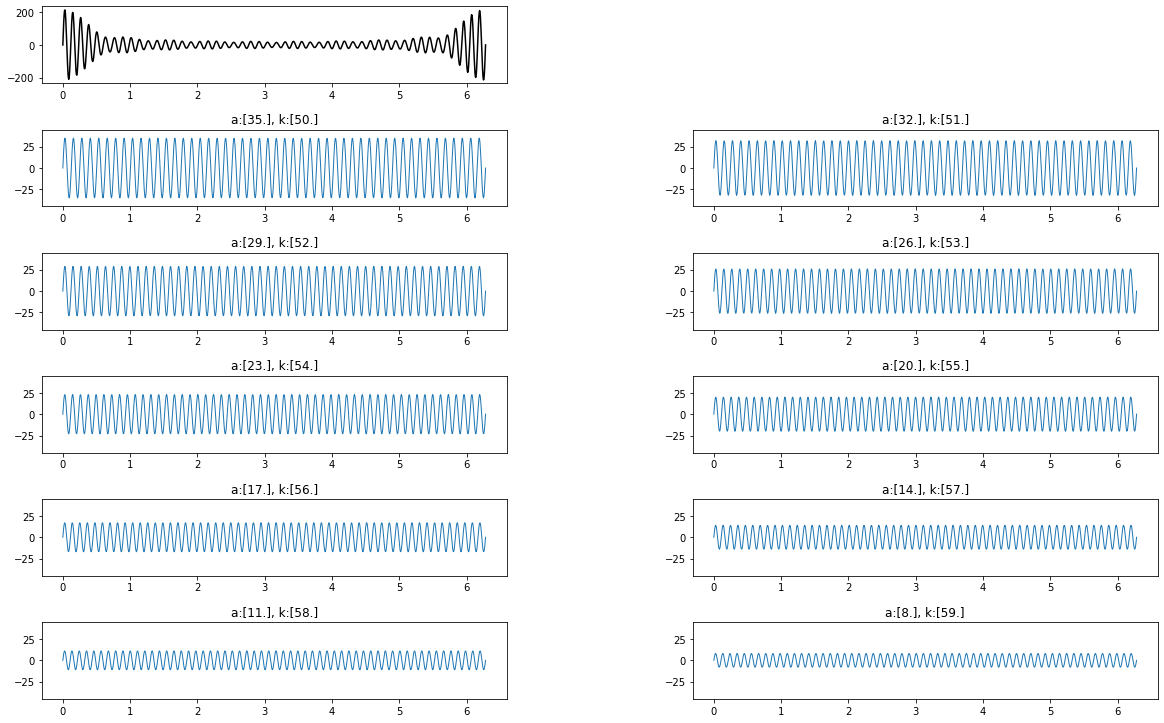

In [518]:
y_li[:,n] = np.sin(int(k_li[n])*(x)*2*np.pi)*int(a_li[n])

x = np.linspace(0,2*np.pi,num=points)
plt.figure(figsize=(20,15))

for n in range(0,modes):
    y_li[:,n] = np.sin(int(k_li[n])*x)*int(a_li[n])
    
    plt.subplot((modes//2)+2,2,n+3)
    plt.plot(x,y_li[:,n], linewidth=1)
    plt.ylim(-int(np.max(a_li)+10), int(np.max(a_li)+10))
    plt.title("a:{}, k:{}".format(a_li[n], k_li[n]))
    
    
y_funct = y_li.sum(axis=1)

plt.subplot((modes//2)+2,2,1)
plt.plot(x,y_funct, color='black')
plt.subplots_adjust(wspace=0.4, hspace=0.6)

#print("a_li is: {}, \n k_li is {}, \n y_li is: {}".format(a_li, k_li, y_li))

(7.0, 10.0)

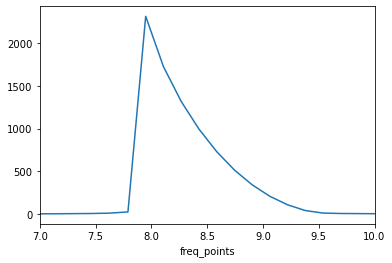

In [517]:
da_modes = xr.DataArray(y_li, dims=['points','modes'], coords={'points':x})
da_funct = xr.DataArray(y_funct, dims=['points'], coords={'points':x})
da_spec = xrft.power_spectrum(da_funct, dim='points')
da_spec.plot()
#plt.xscale('log')
#plt.yscale('log')
plt.xlim(7,10)